In [77]:
import numpy as np
import matplotlib.pyplot as plt
from feature_effect_empirical_analysis.data_generation import generate_data

plt.style.use("fivethirtyeight")

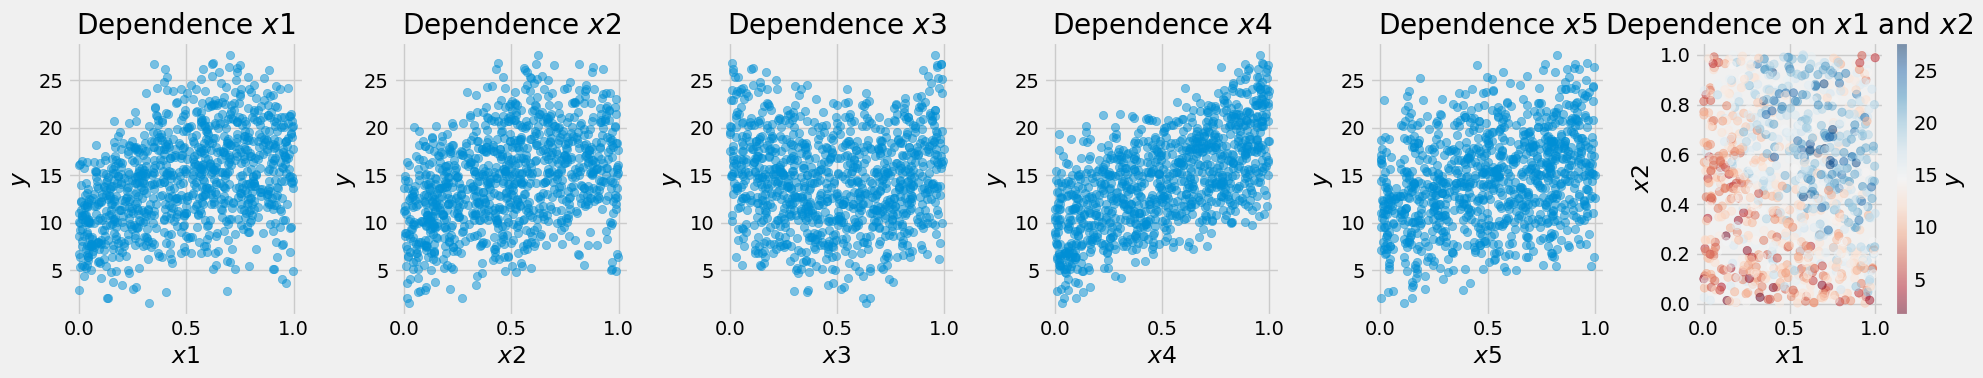

In [78]:
X_train, y_train, X_test, y_test = generate_data(
    n_train=1000, n_test=1000, noise_sd=0
)

plt.figure(figsize=(20, 4), dpi=100)
for i in range(5):
    plt.subplot(1, 6, i + 1)
    plt.scatter(X_train[:, i], y_train, alpha=0.5)
    plt.title(f"Dependence $x{i + 1}$")
    plt.ylabel("$y$")
    plt.xlabel(f"$x{i + 1}$")
plt.subplot(1, 6, 6)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="RdBu", alpha=0.5)
plt.title("Dependence on $x1$ and $x2$")
plt.ylabel("$x2$")
plt.xlabel("$x1$")
plt.colorbar(label="$y$")
plt.tight_layout()
plt.show()

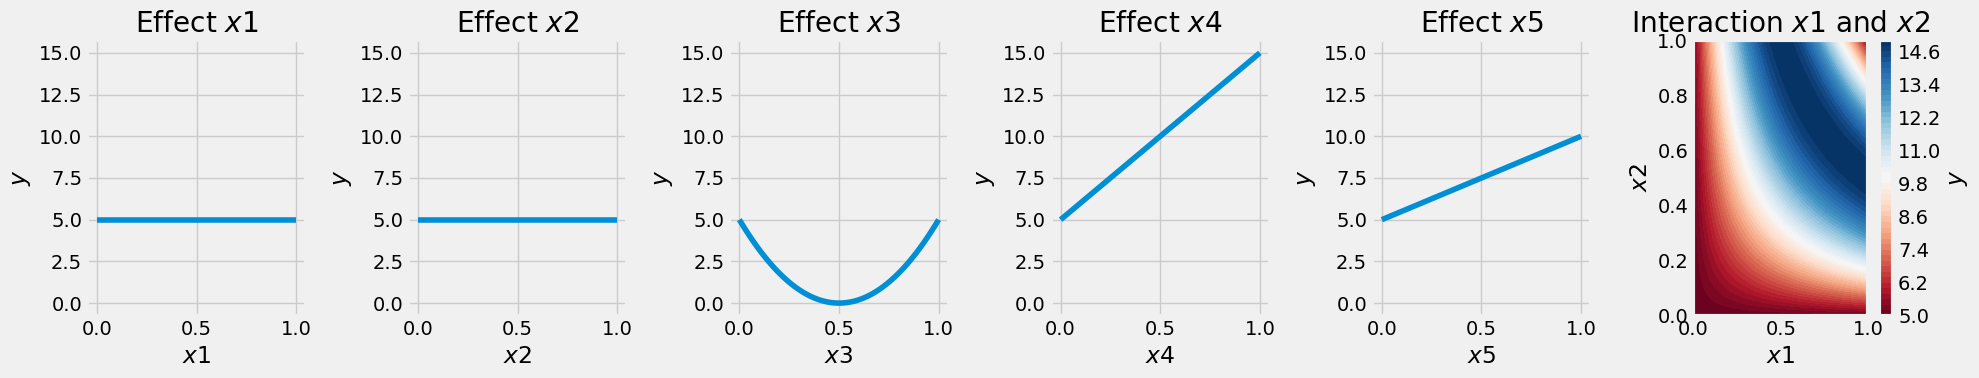

In [80]:
def groundtruth(X): return 10 * np.sin(np.pi *
                                       X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4]


plt.figure(figsize=(20, 4), dpi=100)
x_values = np.linspace(0, 1, 100)

for i in range(5):
    X = np.zeros((100, 5))
    X[:, i] = x_values
    if i == 0:
        ax0 = plt.subplot(1, 6, i + 1)
    else:
        plt.subplot(1, 6, i + 1, sharey=ax0, sharex=ax0)
    plt.plot(x_values, groundtruth(X), label=f'Feature {i+1}')
    plt.title(f"Effect $x{i + 1}$")
    plt.ylabel("$y$")
    plt.xlabel(f"$x{i + 1}$")
x1, x2 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
x3, x4, x5 = 0, 0, 0
Z = groundtruth(np.column_stack((x1.ravel(), x2.ravel(), np.full(
    x1.size, x3), np.full(x1.size, x4), np.full(x1.size, x5)))).reshape(x1.shape)
plt.subplot(1, 6, 6)
plt.contourf(x1, x2, Z, levels=50, cmap='RdBu')
plt.title("Interaction $x1$ and $x2$")
plt.ylabel("$x2$")
plt.xlabel("$x1$")
plt.colorbar(label="$y$")
plt.tight_layout()
plt.show()